## XG Boost Regressor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')


In [4]:
df.dropna(inplace=True)

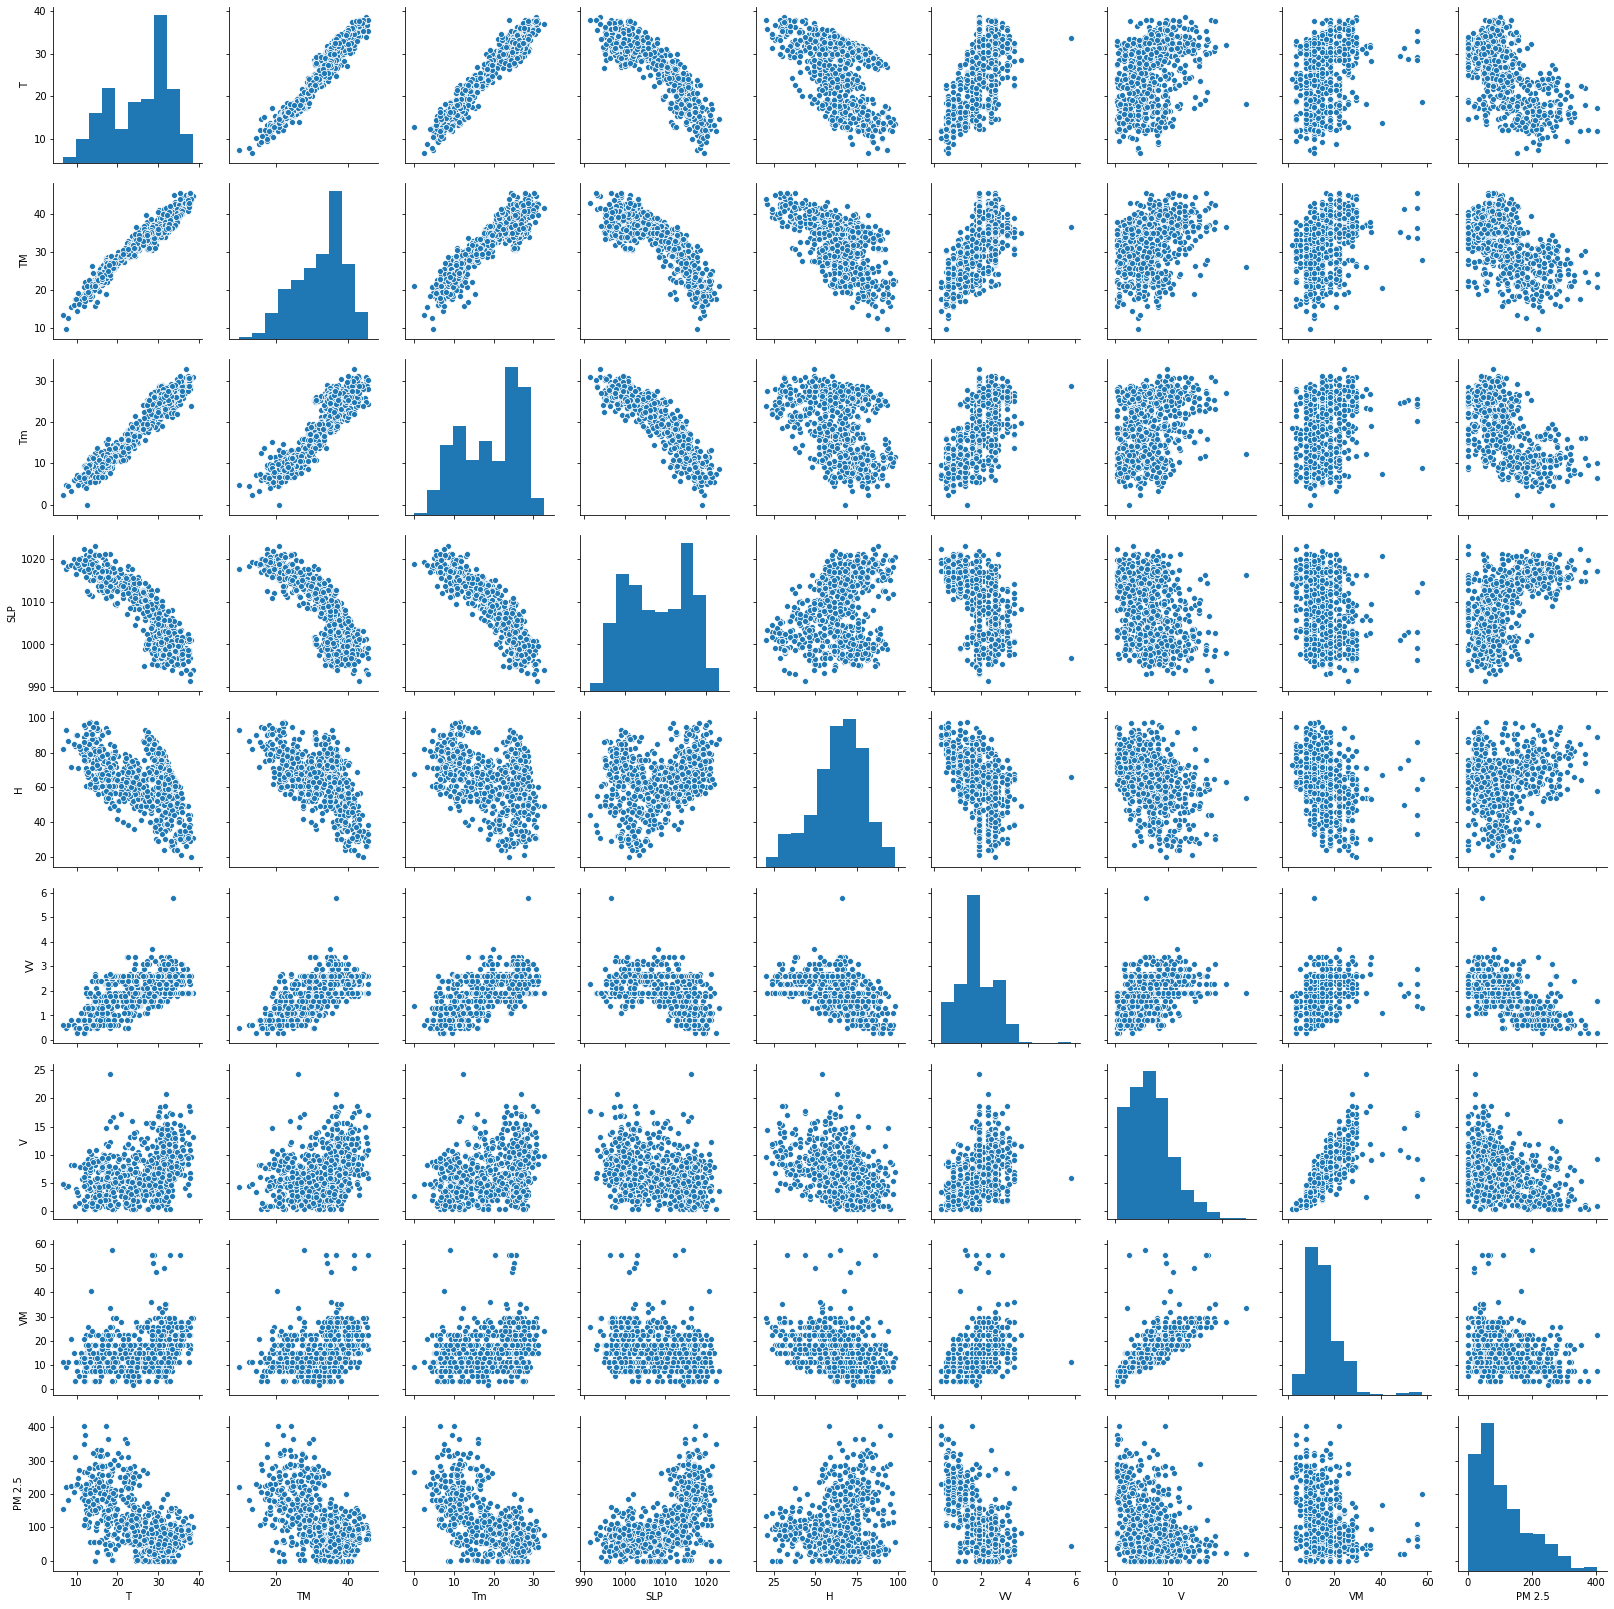

In [5]:
sns.pairplot(df)

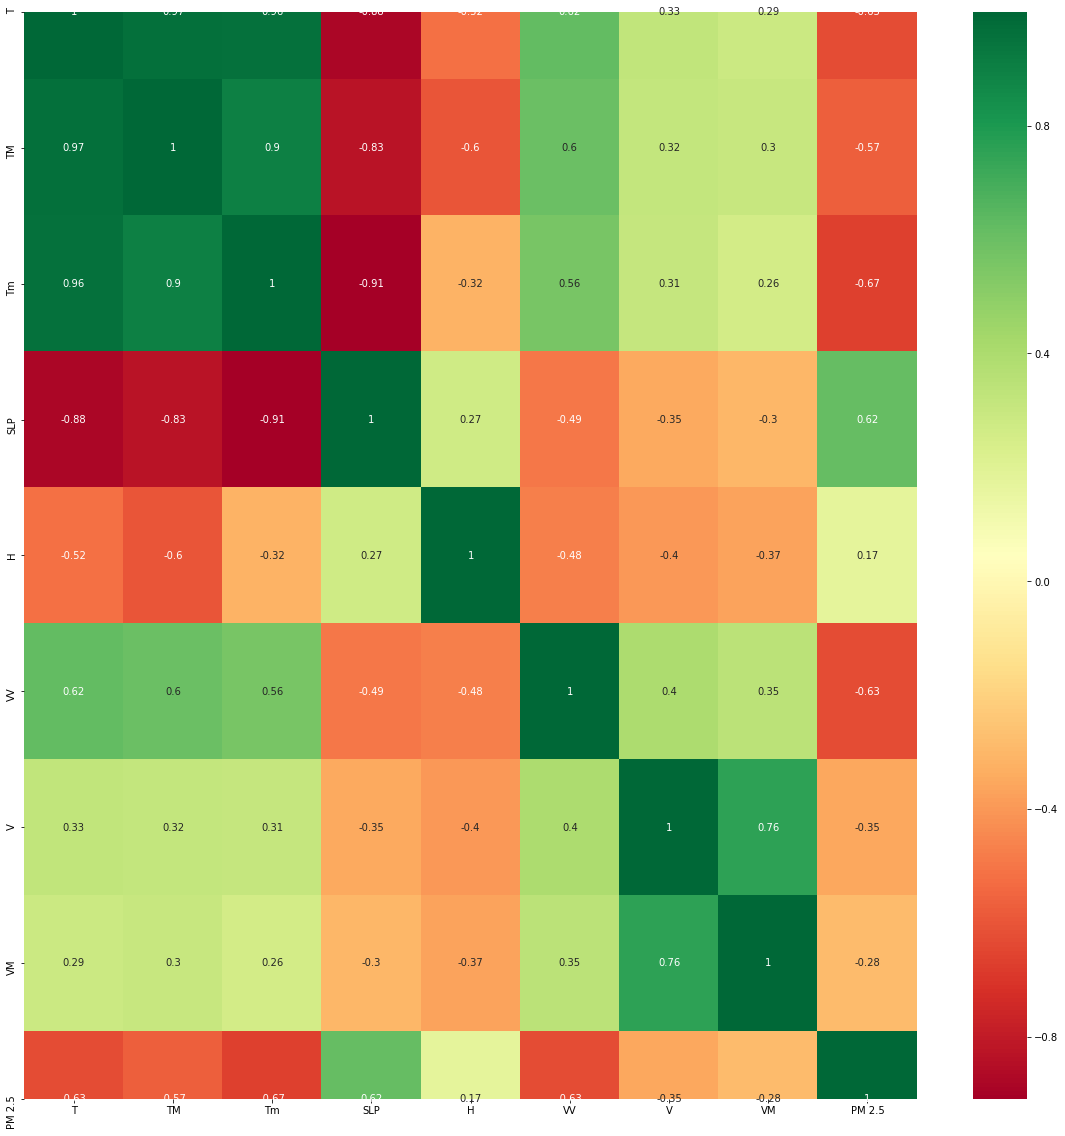

In [6]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

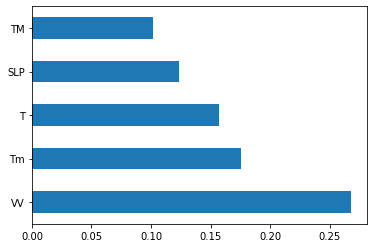

In [8]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

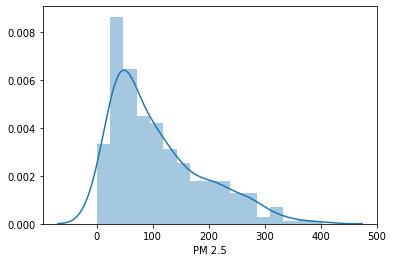

In [9]:
sns.distplot(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
import xgboost as xgb


In [14]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

[12:53:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor()

In [15]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8607281497664878


In [16]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6792207853681125


In [17]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X, y, cv=5)

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:55:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [18]:
score.mean()

0.5408681605575619

## Model Evaluation

In [19]:
prediction = regressor.predict(X_test)

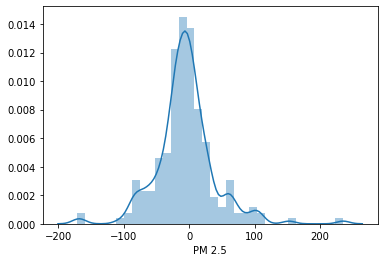

In [20]:
sns.distplot(y_test-prediction)

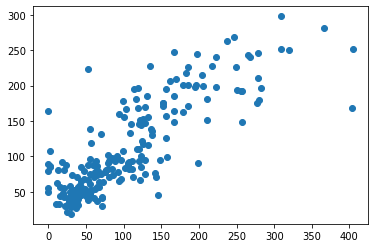

In [21]:
plt.scatter(y_test, prediction)

In [ ]:
xgb.XGBRegressor()

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200, num=12)]
learning_rate = ['0.05','0.1','0.2','0.3','0.5','0.6']
max_depth = [int(x) for x in np.linspace(start = 5, stop=30, num=6)]
subsample = [0.7, 0.6,0.8]
min_child_weight = [3,4,5,6,7]

In [26]:
random_grid = {
    'n_estimators' : n_estimators,
    'learning_rate' : learning_rate,
    'max_depth' : max_depth,
    'subsample' : subsample,
    'min_child_weight' : min_child_weight
}

In [27]:
regressor = xgb.XGBRegressor()

In [29]:
rscv = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=100, cv= 5, verbose=2, random_state=42)

In [30]:
rscv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[13:08:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[13:08:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[13:08:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[13:08:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[13:08:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[13:08:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[13:09:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[13:09:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[13:09:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[13:09:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[13:09:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[13:09:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[13:09:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[13:09:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[13:09:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:09:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:09:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:09:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:09:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:09:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[13:09:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[13:09:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[13:09:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[13:09:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[13:09:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[13:09:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[13:09:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[13:09:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[13:09:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[13:09:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:09:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:09:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:09:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:09:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:09:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[13:09:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[13:09:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.2s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[13:09:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[13:09:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.2s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[13:09:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.4s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[13:09:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[13:09:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[13:09:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[13:09:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[13:09:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[13:09:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[13:09:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[13:09:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[13:09:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[13:09:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[13:09:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[13:09:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[13:09:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[13:09:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[13:09:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[13:09:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[13:09:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[13:09:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[13:09:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[13:09:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[13:09:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[13:09:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[13:09:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[13:09:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[13:09:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[13:09:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[13:09:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[13:09:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[13:09:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[13:09:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   1.4s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:09:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:09:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:09:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:09:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:09:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:09:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:09:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:09:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:09:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:09:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.0s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:09:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.7s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:09:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.7s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:09:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.8s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:09:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.7s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:09:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[13:09:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[13:10:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[13:10:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[13:10:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[13:10:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[13:10:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[13:10:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[13:10:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[13:10:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.3s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[13:10:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[13:10:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[13:10:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[13:10:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[13:10:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[13:10:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:10:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:10:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:10:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:10:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:10:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:10:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:10:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:10:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:10:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:10:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:10:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:10:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:10:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:10:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:10:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.2s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[13:10:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   1.8s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[13:10:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   1.5s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[13:10:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   1.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[13:10:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   1.5s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[13:10:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   1.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[13:10:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[13:10:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[13:10:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[13:10:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[13:10:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.3s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[13:10:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[13:10:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[13:10:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[13:10:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[13:10:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[13:10:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[13:10:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[13:10:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[13:10:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[13:10:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[13:10:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[13:10:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[13:10:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[13:10:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   1.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[13:10:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[13:10:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[13:10:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[13:10:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[13:10:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   0.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[13:10:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:10:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.2s

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:10:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:10:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:10:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:10:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[13:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[13:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[13:10:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[13:10:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[13:10:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[13:10:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[13:10:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[13:10:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[13:10:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[13:10:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[13:10:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[13:10:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[13:10:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[13:10:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[13:10:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[13:10:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[13:10:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[13:10:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[13:10:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[13:10:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.8s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:10:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:10:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:10:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:10:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:10:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:10:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.3s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:10:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.4s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:10:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.5s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:10:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.7s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:10:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:11:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:11:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:11:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:11:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:11:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[13:11:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[13:11:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.1s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[13:11:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[13:11:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[13:11:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:11:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:11:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.2s


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:11:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.2s


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:11:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.2s


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:11:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.2s


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[13:11:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[13:11:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[13:11:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[13:11:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[13:11:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[13:11:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   1.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[13:11:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[13:11:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[13:11:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[13:11:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[13:11:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[13:11:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[13:11:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[13:11:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[13:11:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[13:11:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.0s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[13:11:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.4s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[13:11:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.3s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[13:11:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.3s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[13:11:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.0s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:11:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   4.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:11:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:11:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:11:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:11:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[13:11:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   1.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[13:11:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   2.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[13:11:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   1.4s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[13:11:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   1.4s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[13:11:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   1.4s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:11:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   0.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:11:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   0.8s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:11:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:11:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   0.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[13:11:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   0.7s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[13:11:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[13:11:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[13:11:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[13:11:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[13:11:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:11:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:11:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:11:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:12:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   1.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:12:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   1.8s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:12:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:12:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.0s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:12:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   0.8s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:12:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[13:12:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:12:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:12:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:12:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:12:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:12:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:12:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.3s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:12:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:12:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:12:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:12:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[13:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[13:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[13:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[13:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[13:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[13:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[13:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[13:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[13:12:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[13:12:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[13:12:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[13:12:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[13:12:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[13:12:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[13:12:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.4s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:12:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:12:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:12:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:12:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[13:12:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[13:12:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[13:12:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[13:12:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[13:12:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[13:12:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:12:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:12:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:12:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:12:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[13:12:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[13:12:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[13:12:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[13:12:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[13:12:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[13:12:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:12:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:12:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:12:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.4s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[13:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[13:12:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[13:12:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[13:12:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[13:12:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[13:12:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[13:12:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.0s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[13:12:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   0.9s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[13:12:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.1s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[13:12:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   0.8s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[13:12:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:12:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:12:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:12:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:12:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:12:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[13:12:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   1.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[13:12:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[13:12:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[13:12:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[13:12:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   1.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:12:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:12:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.9s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:12:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:12:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:13:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[13:13:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[13:13:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[13:13:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[13:13:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[13:13:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[13:13:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[13:13:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[13:13:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[13:13:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[13:13:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[13:13:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[13:13:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[13:13:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[13:13:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[13:13:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[13:13:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[13:13:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[13:13:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[13:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[13:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[13:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[13:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[13:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[13:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[13:13:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:13:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.0s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:13:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.1s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:13:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.3s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:13:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   1.9s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[13:13:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   1.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:13:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:13:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:13:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:13:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[13:13:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[13:13:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[13:13:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[13:13:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[13:13:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[13:13:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   0.7s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:13:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.3s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:13:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.3s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:13:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.4s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:13:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[13:13:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:13:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:13:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:13:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:13:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[13:13:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[13:13:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[13:13:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[13:13:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[13:13:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[13:13:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:13:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:13:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:13:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.2s

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:13:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[13:13:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[13:13:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.5s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[13:13:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[13:13:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[13:13:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   1.0s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[13:13:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[13:13:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[13:13:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[13:13:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[13:13:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[13:13:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[13:13:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[13:13:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[13:13:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[13:13:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[13:13:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.1s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[13:13:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[13:13:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[13:13:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.9s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[13:13:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[13:13:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.7s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:13:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:13:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:13:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:13:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:13:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:13:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.8s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:13:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.8s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:13:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.8s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:13:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.7s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:13:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.8s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[13:13:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.6s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[13:13:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.6s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[13:13:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.6s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[13:13:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.6s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[13:13:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[13:13:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[13:13:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[13:13:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[13:13:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[13:13:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:13:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:13:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:13:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:13:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[13:13:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[13:13:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.1s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[13:14:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[13:14:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[13:14:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.4s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[13:14:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.3s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[13:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[13:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[13:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[13:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[13:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[13:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[13:14:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[13:14:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[13:14:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[13:14:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[13:14:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[13:14:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[13:14:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[13:14:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.4s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[13:14:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:14:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:14:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:14:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:14:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[13:14:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[13:14:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[13:14:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[13:14:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.2s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[13:14:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[13:14:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.2s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:14:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:14:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.7s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:14:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:14:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.7s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[13:14:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[13:14:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[13:14:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[13:14:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[13:14:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[13:14:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:14:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:14:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:14:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:14:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[13:14:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[13:14:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.0s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[13:14:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[13:14:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[13:14:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.0s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[13:14:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.1s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:14:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:14:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[13:14:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:14:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:14:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:14:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:14:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[13:14:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.1s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:14:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:14:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.8s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:14:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.7s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:14:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   1.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[13:14:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   2.1s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:14:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:14:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:14:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:14:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[13:14:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[13:14:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   1.0s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[13:14:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   1.1s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[13:14:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[13:14:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   1.1s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[13:14:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   0.8s
[13:14:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.0min finished
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=100,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
rscv.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [32]:
rscv.best_score_

-2641.4356387008706

In [33]:
predict = rscv.predict(X_test)

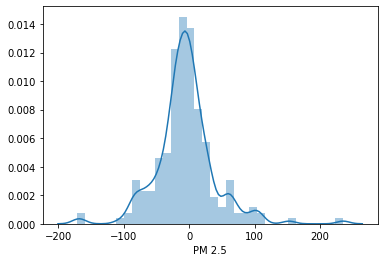

In [34]:
sns.distplot(y_test-prediction)

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 31.388095036452945
MSE: 2094.096061384952
RMSE: 45.7612943587149


In [37]:
import pickle
file = open('xgboostregessor_model.pkl', 'wb')
pickle.dump(rscv, file)